# Importing Module and define directories

In [2]:
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

import numpy as np
import time
import matplotlib.pyplot as plt
from MLP import MLP

# Train - Validation Split

In [3]:
data=np.loadtxt("../../data/TR.csv",delimiter=",")
input_data=data[:,1:-2][0:1000]
labels=data[:,-2:][0:1000]
val_data=data[:,1:-2][1000:-1]
val_labels=data[:,-2:][1000:-1]

# Define the MLP

In [4]:
structure=[10,8,20,np.shape(labels)[1]]
act_func=[("sigmoid",1),("sigmoid",1),("sigmoid",1),("linear",1)]
start=[0.001,0.05,0.05,0.01]
learning_rate=5e-5
lamb=1e-4
netw = MLP(structure, func=act_func,
           starting_points=start, 
           eta = learning_rate, lamb = lamb)



## Train the model

In [5]:
N_epoch = 300
netw.train(input_data, labels, val_data, val_labels, epoch = N_epoch)

Epoch 300: --- [train error = 12.4035] --- [val error = 11.7115]                                  
Elapsed time: 4.737130641937256 s


### And... retrain the model!

In [6]:
netw.train(input_data, labels, val_data, val_labels, epoch = 300)

Epoch 600: --- [train error = 9.5734] --- [val error = 9.1522]                                    
Elapsed time: 4.894962549209595 s


## Predict the output

In [7]:
train_pred = netw.predict(input_data)
val_pred = netw.predict(val_data)

# Plot results

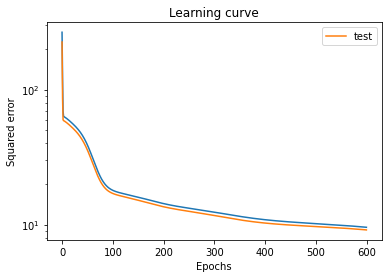

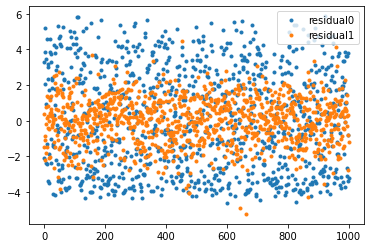

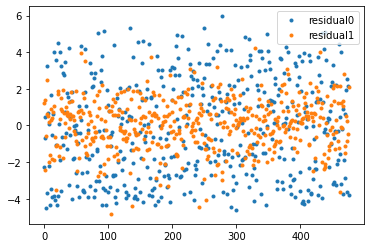

In [8]:
x = np.arange(len(netw.error))

plt.plot(x,netw.error)
plt.plot(x,netw.val_error,label="test")

plt.title("Learning curve")
plt.xlabel("Epochs")
plt.ylabel("Squared error")
plt.yscale("log")
plt.legend()
plt.show()

plt.plot(np.arange(len(labels)),labels[:,0]-train_pred[:,0],".",label="residual0")
plt.plot(np.arange(len(labels)),labels[:,1]-train_pred[:,1],".",label="residual1")
plt.legend()
plt.show()

plt.plot(np.arange(len(val_labels)),val_labels[:,0]-val_pred[:,0],".",label="residual0")
plt.plot(np.arange(len(val_labels)),val_labels[:,1]-val_pred[:,1],".",label="residual1")
plt.legend()
plt.show()